# Project: Wrangling and Analyze Data (WeRateDogs)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#eda">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction
>The dataset used in this analysis is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 
>
>These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.

<a id='gather'></a>
## Data Gathering

In [1]:
#Importing relevant packages
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import os
from timeit import default_timer as timer
pd.set_option('display.max_colwidth', -1)

1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Loading of the dataset
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
#Loading of the dataset
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
end = timer()
print(end - start)
print(fails_dict)

0.000316716999975597
{}


In [6]:
tweets = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet_data = json.loads(line)
        tweets.append(tweet_data)
        
tweet_count = pd.DataFrame(tweets, columns = ['id', 'retweet_count', 'favorite_count'])


<a id='assess'></a>
## Assessing Data

### Visual Assessment

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [8]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
tweet_count

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Programmatic Assessment

In [10]:
#Returns five random entries from the twitter_archive dataset
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
337,832397543355072512,NaN,NaN,2017-02-17 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Eevee. She wants to see how you're doing. Just checkin pup on you. She hopes you're doing okay. 12/10 extremely good girl https://t.co/nqAJGCHKEt,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/832397543355072512/photo/1,https://twitter.com/dog_rates/status/832397543355072512/photo/1",12,10,Eevee,None,None,None,None
1419,698342080612007937,NaN,NaN,2016-02-13 03:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maximus. He's training for the tetherball world championship. The grind never stops. 11/10 (vid by @Amuly21) https://t.co/VmFfWMjNkp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698342080612007937/video/1,11,10,Maximus,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,811740824.0,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",15,10,None,None,None,None,None
2059,671186162933985280,NaN,NaN,2015-11-30 04:37:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sparky. That's his pancake now. He will raise it as his own. 10/10 https://t.co/96tMaWyoWt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671186162933985280/photo/1,10,10,Sparky,None,None,None,None
1180,719339463458033665,NaN,NaN,2016-04-11 01:41:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lucy and Sophie. They think they're the same size. Both 10/10 would snug at same time https://t.co/HW50zkcf2R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719339463458033665/photo/1,10,10,Lucy,None,None,None,None


In [11]:
#Checking the columns information
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#Checking the descriptive statistics of the twitter_archive dataset
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#Checking the last five samples of the twitter_archive dataset
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [14]:
#Checking the value counts of the source column in the twitter_archive dataset
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [15]:
#Checking for duplicate rows
sum(twitter_archive.duplicated())

0

In [16]:
#Checking for unique values of each column
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64

In [17]:
#Checking for the value_counts of the rating numerator feature
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [18]:
#Checking for the value_counts of the rating denominator feature
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [19]:
#Returns five random sample entries
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
217,670069087419133954,https://pbs.twimg.com/media/CUyQRzHWoAAhF1D.jpg,1,boathouse,0.313829,False,birdhouse,0.138331,False,ashcan,0.045673,False
100,667782464991965184,https://pbs.twimg.com/media/CURwm3cUkAARcO6.jpg,1,lorikeet,0.466149,False,hummingbird,0.083011,False,African_grey,0.054247,False
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.255917,True,grocery_store,0.079799,False
1897,850380195714523136,https://pbs.twimg.com/ext_tw_video_thumb/850380153985355777/pu/img/lFouhg-EZvJs8eMr.jpg,1,Yorkshire_terrier,0.249012,True,Maltese_dog,0.166364,True,Shih-Tzu,0.142254,True
1559,793256262322548741,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,1,basset,0.207622,True,Walker_hound,0.060574,True,beagle,0.041221,True


In [20]:
#Checking each columns data types, null values and names
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#Reurns five random samples entries
tweet_count.sample(5)

,id,retweet_count,favorite_count
1302,707411934438625280,673,2486
1342,704499785726889984,1124,3212
250,844979544864018432,2909,14738
896,758854675097526272,1027,3904
1877,675015141583413248,1335,2918


In [22]:
#Checking each column's information
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
Twitter archive table
 
1. Only original tweets are needed therefore no retweets.

2. Original tweets with images (image_urls).

3. Descriptive column name (dog_name) instead of name.

4. "O" instead of "O'Malley" as dog name.

5. Texts not readable in source columns

6. Erroneous datatypes (tweet_id, timestamp, source, dog_stage, rating_numerator, and rating_denominator)

7. &amp instead of & in the text column. 

8. Some texts contain floof and still have 'None' as their dog stage values 

9. The dog_name column contain inconsistencies like a, the, quite, an, such, not, very, mad etc.

10. Tweet with incorrect rating of 24/7 which means another thing.

Image predictions table

1. Erroneous datatypes (tweet_id)

Tweet count table

1. tweet_id instead of id in order to merge with the other tables.

2. Erroneous datatypes (tweet_id)

### Tidiness issues
1. One variable in four columns in twitter archive table (dog_stages)

2. Irrelevant columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, and
   in_reply_to_user_id
   
3. Merge the Image predictions, tweet count and twitter archive tables to form a single table.

<a id='clean'></a>
## Cleaning Data
Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Making copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_predictions.copy()
tweet_count_clean = tweet_count.copy()

### Issue #1: One variable in four columns in twitter archive table (dog_stages)

#### Define: Creating a new feature dog stage by extracting  values from doggo, floofer, pupper and puppo features

#### Code

In [24]:
#Creating a new feature dog_stage by extracing the values from doggo, floofer, pupper and puppo columns
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)
#Dropping the doggo, floofer, pupper, and puppo columns
twitter_archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [25]:
#Viewing the first five rows
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


In [26]:
#Checking the value counts of the dog_stage column
twitter_archive_clean.dog_stage.value_counts()

pupper     265
doggo      93 
puppo      37 
floofer    4  
Name: dog_stage, dtype: int64

### Issue #2: Only original tweets are needed therefore no retweets.

#### Define: Extracting out the original tweets by removing rows where the retweet features have values

#### Code

In [27]:
#Extracting the rows that do not contain retweets and their replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_user_id'].isnull()]

#### Test

In [28]:
#Checking whether there are rows that still contain retweets
twitter_archive_clean.retweeted_status_id.notna().sum()

0

In [29]:
#Checking whether there are rows that still contain replies
twitter_archive_clean.in_reply_to_user_id.notna().sum()

0

### Issue #3: Irrelevant columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, and in_reply_to_user_id)

#### Define: Removing some irrelevant columns using the drop method

#### Code

In [30]:
#Dropping irrelevant columns 
twitter_archive_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                      'in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

#### Test

In [31]:
#Checking the columns information to ensure that the deleted features are no longer in the dataset
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             353 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


### Issue #4: tweet_id instead of id in order to merge with the other tables.

#### Define: Changing the id column name to tweet_id in tweet count table using rename method

#### Code

In [32]:
#Changing the column name from id to tweet_id
tweet_count_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [33]:
#Checking the tweet count table information to ensure that the column name has been changed
tweet_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Issue #5: Merge the Image predictions, tweet count and twitter archive tables to form a single table

#### Define: Merging the three tables to a single table using the merge method

#### Code

In [34]:
#Merging the three datasets to form a single table called clean_twitterdata
twitterdata_clean = pd.merge(twitter_archive_clean, image_pred_clean,
                            on=['tweet_id'], how='left')
clean_twitterdata = pd.merge(twitterdata_clean, tweet_count_clean,
                            on=['tweet_id'], how='left')

#### Test

In [35]:
#Checking the first five rows of the new dataset
clean_twitterdata.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [36]:
#Checking the columns information of the new dataset
clean_twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             353 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
retweet_count         2097 non-nu

### Issue #6: Original tweets with images (image_urls)

#### Define: Extracting only tweets with jpg_url

#### Code

In [37]:
#Extracting the rows where the jpg url column is not null
clean_twitterdata = clean_twitterdata[~clean_twitterdata['jpg_url'].isnull()]

#### Test

In [38]:
#Checking whether there are null values in the jpg url column
clean_twitterdata.jpg_url.isnull().sum()

0

In [39]:
#Checking the columns information 
clean_twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             322 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
retweet_count         1971 non-nu

In [40]:
#Viewing the first five rows
clean_twitterdata.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


### Issue #7: Descriptive column name (dog_name) instead of name

#### Define: Change the column name 'name' to 'dog_name'

#### Code

In [41]:
#Renaming the name feature to a more descriptive name (dog_name)
clean_twitterdata.rename(columns = {'name':'dog_name'}, inplace = True)

#### Test

In [42]:
#Checking the column names
clean_twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
dog_name              1971 non-null object
dog_stage             322 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
retweet_count         1971 non-nu

### Issue #8: "O" instead of "O'Malley" as dog name

#### Define: Replace "O" with "Ö'Malley" in the dog name column

#### Code

In [43]:
#Checking for the row where dog name is "O"
clean_twitterdata.query('dog_name == "O"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
594,776201521193218049,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,NaN,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,...,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True,2919,10681


In [44]:
#Changing the dog name from "O" to "O'Malley"
clean_twitterdata['dog_name'] = clean_twitterdata['dog_name'].replace('O', "O'Malley")

#### Test

In [45]:
#Checking for the row where dog name is "O"
clean_twitterdata.query('dog_name == "O"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Issue #9: Texts not readable in source column

#### Define: Replacing texts in source column with readable texts

#### Code

In [46]:
#Checking the value counts of the source feature
clean_twitterdata.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [47]:
#Creating two python lists to be used in the function below
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 
               '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
               '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
source_value = ['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck']

#Function to replace the source_list in the source column with the source_value
for sources in source_list:
    clean_twitterdata.source.replace(source_list, source_value, inplace = True)

#### Test

In [48]:
#Checking the value counts of the source feature
clean_twitterdata.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

### Issue #10: Erroneous datatypes (tweet_id, timestamp, source, dog_stage, rating_numerator, and rating_denominator)

#### Define: Changing the data types of these features to their correct data types

#### Code

In [49]:
#Changing the data types of some features
clean_twitterdata[['rating_numerator', 'rating_denominator']] = clean_twitterdata[['rating_numerator', 'rating_denominator']].astype('float')
clean_twitterdata[['source', 'dog_stage']] = clean_twitterdata[['source', 'dog_stage']].astype('category')
clean_twitterdata['tweet_id'] = clean_twitterdata['tweet_id'].astype('str')
clean_twitterdata[['p1_dog', 'p2_dog', 'p3_dog']] = clean_twitterdata[['p1_dog', 'p2_dog', 'p3_dog']].astype('bool')
clean_twitterdata['timestamp'] = pd.to_datetime(clean_twitterdata['timestamp'])

#### Test

In [50]:
#Checking the data types of the features
clean_twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null category
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
dog_name              1971 non-null object
dog_stage             322 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         

### Issue #11: &\\amp; instead of & in the text column

#### Define: Replacing values (&\amp;) with & in the text column

#### Code

In [51]:
#Replacing &amp; with & in the text column
clean_twitterdata['text'] = clean_twitterdata['text'].str.replace('&amp;', '&')

#### Test

In [52]:
#Checking whether the text values still contains &amp;
clean_twitterdata[clean_twitterdata.text.str.contains('&amp;')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Issue #12: Some texts contain floof and still have 'None' as their dog stage values

#### Define: Replace floof in text to floofer for values in dog stage

#### Code

In [53]:
#Checking the value counts of floofer for the dog stage feature
clean_twitterdata.dog_stage.value_counts()

pupper     220
doggo      71 
puppo      28 
floofer    3  
Name: dog_stage, dtype: int64

In [54]:
#Creating a list of texts that contains floof in it
floof_texts = ["This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp",
        "This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ",
        'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
        "This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm",
        "This is Nimbus (like the cloud). He just bought this fancy af duck raincoat. Only protects one ear tho. 12/10 so h*ckin floofy https://t.co/SIQbb8c3AU",
        "Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q",
        'This is Heinrich (pronounced "Pat"). He\'s a Botswanian Vanderfloof. Snazzy af bandana. 12/10 downright puptacular https://t.co/G56ikYAqFg',
        "This is Gilbert. He's being chased by a battalion of miniature floof cows. 10/10 we all believe in you Gilbert https://t.co/wayKZkDRTG",
        "Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R",
        "This is Sugar. She's a Bolivian Superfloof. Spherical af. 12/10 would never let go of https://t.co/AhMfUu6Onm",
        "This is Olaf. He's gotta be rare. Seems sturdy. Tail is floofy af. 12/10 would do whatever it takes to pet https://t.co/E9jaU59bh9",
        "This is Cecil. She's a Gigglefloof Poofer. Outdoorsy af. One with nature. 12/10 would strategically capture https://t.co/ijJB0DuOIC",
        "This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW",
        "This is Fiji. She's a Powdered Stegafloof. Very rare. 12/10 https://t.co/fZRob6eotY",
        "This is Chester. He's a Benefloof Cumberbark. Fabulous ears. Nifty shirt. Was probably on sale. Nice hardwood. 11/10 https://t.co/YoII7tWXMT",
        "This is a rare Arctic Wubberfloof. Unamused by the happenings. No longer has the appetites. 12/10 would totally hug https://t.co/krvbacIX0N",
        "Say hello to Peaches. She's a Dingleberry Zanderfloof. 13/10 would caress lots https://t.co/YrhkrTsoTt",
        "Meet Luca. He's a Butternut Scooperfloof. Glorious tongue. 12/10 would pet really well https://t.co/VcxZQPNZaV",
        "This is Flávio. He's a Macedonian Poppycock. 97% floof. Jubilant af. 11/10 personally I'd pet the hell out of https://t.co/BUyX7isHRg"]

#Function to replace NaN with floofer for texts that have floof in them
for floof in floof_texts:
    texts = clean_twitterdata.text == floof
    clean_twitterdata.loc[texts, 'dog_stage'] = "floofer"

#### Test

In [55]:
#Checking the dog stage to ensure that it was replaced with floofer
clean_twitterdata[clean_twitterdata['text'].str.contains('floof')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
24,887101392804085760,2017-07-18 00:07:08,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12.0,10.0,None,floofer,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,...,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True,6167,31061
42,883360690899218434,2017-07-07 16:22:55,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13.0,10.0,Grizzwald,floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,...,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,3825,22986
49,881906580714921986,2017-07-03 16:04:48,Twitter for iPhone,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,https://twitter.com/dog_rates/status/881906580714921986/photo/1,12.0,10.0,Rey,floofer,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,...,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False,3533,24773
339,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70.0,None,floofer,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,...,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,3716,13518
450,800388270626521089,2016-11-20 17:20:08,Twitter for iPhone,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,"https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1",12.0,10.0,Doc,floofer,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,...,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True,3265,12456
470,796080075804475393,2016-11-08 20:00:55,Twitter for iPhone,This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,https://twitter.com/dog_rates/status/796080075804475393/photo/1,12.0,10.0,Yogi,floofer,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,...,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False,2703,9469
476,794332329137291264,2016-11-04 00:15:59,Twitter for iPhone,This is Nimbus (like the cloud). He just bought this fancy af duck raincoat. Only protects one ear tho. 12/10 so h*ckin floofy https://t.co/SIQbb8c3AU,https://twitter.com/dog_rates/status/794332329137291264/photo/1,12.0,10.0,Nimbus,floofer,https://pbs.twimg.com/media/CwYJBiHXgAQlvrh.jpg,...,0.988307,True,malamute,0.004906,True,Great_Pyrenees,0.002901,True,3088,10686
569,780543529827336192,2016-09-26 23:04:13,Twitter for iPhone,Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,https://twitter.com/dog_rates/status/780543529827336192/photo/1,12.0,10.0,None,floofer,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,...,0.628312,True,Labrador_retriever,0.317365,True,Tibetan_mastiff,0.012260,True,2032,7040
593,776218204058357768,2016-09-15 00:36:55,Twitter for iPhone,Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,"https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/7

In [56]:
#Checking the value counts of floofer for the dog stage feature
clean_twitterdata.dog_stage.value_counts()

pupper     220
doggo      71 
puppo      28 
floofer    22 
Name: dog_stage, dtype: int64

### Issue #13: The dog_name column contain inconsistencies like a, the, quite, an, such, not, very, mad etc

#### Define: Extracting dog names from texts for values like a, the, quite, etc. in the dog name column

#### Code

In [57]:
#Extracting the inconsistent names that are in lowercases
replace_unknown_names = clean_twitterdata.loc[(clean_twitterdata['dog_name'].str.islower())]
#Viewing the first five rows
replace_unknown_names.head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
21,887517139158093824,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14.0,10.0,such,NaN,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,...,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,12082,46959
51,881536004380872706,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10.0,a,pupper,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,...,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,16570,50199
141,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,12.0,10.0,quite,NaN,https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg,...,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False,25661,75193
156,855459453768019968,2017-04-21 16:33:22,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x","https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12.0,10.0,quite,NaN,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,...,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True,8987,31657
289,828650029636317184,2017-02-06 17:02:17,Twitter for iPhone,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK","https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14.0,10.0,one,NaN,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,...,0.649209,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,0.056200,True,1544,10467


In [58]:
#Extracting the inconsistent names that are in lowercases and the texts contain named
replace_named = clean_twitterdata.loc[(clean_twitterdata['dog_name'].str.islower()) & (clean_twitterdata['text'].str.contains('named'))]
#Viewing the first five rows
replace_named.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1610,675706639471788032,2015-12-12 15:59:51,Twitter for iPhone,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10.0,10.0,a,NaN,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,...,0.990300,True,Welsh_springer_spaniel,0.002080,True,cocker_spaniel,0.002014,True,106,693
1704,673636718965334016,2015-12-06 22:54:44,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10.0,10.0,a,NaN,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,...,0.880257,False,corn,0.019421,False,pug,0.019044,True,404,1194
1783,671743150407421952,2015-12-01 17:30:22,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11.0,10.0,a,NaN,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,...,0.419427,True,miniature_poodle,0.237067,True,swing,0.104193,False,248,779
1813,671147085991960577,2015-11-30 02:01:49,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9.0,10.0,a,NaN,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,...,0.467202,True,cairn,0.440122,True,silky_terrier,0.058690,True,254,713
1863,670427002554466305,2015-11-28 02:20:27,Twitter for iPhone,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9.0,10.0,a,NaN,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,...,0.952258,False,toy_terrier,0.038872,True,beagle,0.003226,True,179,551


In [59]:
#Extracting the inconsistent names that are in lowercases and the texts contain name is
replace_nameis = clean_twitterdata.loc[(clean_twitterdata['dog_name'].str.islower()) & (clean_twitterdata['text'].str.contains('name is'))]
#Viewing the first five rows
replace_nameis.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
657,765395769549590528,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13.0,10.0,my,NaN,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,...,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,0.038875,True,3127,20539
2029,667177989038297088,2015-11-19 03:10:02,Twitter for iPhone,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8.0,10.0,a,NaN,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,...,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True,58,200


In [60]:
# Change to lists
named_list = replace_named['text'].tolist()
nameis_list = replace_nameis['text'].tolist()
unknown_names_list = replace_unknown_names['text'].tolist()

#For loop to iterate through named_list and nameis_list and replace the lowercase letter names with their correct names using 
#regex functions to extract the names from texts
for named in named_list:
    var = clean_twitterdata.text == named
    clean_twitterdata.loc[var, 'dog_name'] = re.findall(r"named\s(\w+)", named)

    
for nameis in nameis_list:
    var = clean_twitterdata.text == nameis
    clean_twitterdata.loc[var, 'dog_name'] = re.findall(r"name is\s(\w+)", nameis)    

# For loop to iterate through unknown_names_list and replace lowercase letter names with the word "None"
for unknown_names in unknown_names_list:
    var = clean_twitterdata.text == unknown_names
    clean_twitterdata.loc[var, 'dog_name'] = "None"
   

#### Test

In [61]:
#Checking the value counts of the dog name feature
clean_twitterdata.dog_name.value_counts()

None        622
Charlie     11 
Cooper      10 
Oliver      10 
Lucy        10 
Penny       9  
Tucker      9  
Sadie       8  
Winston     8  
Daisy       7  
Toby        7  
Lola        7  
Jax         6  
Bella       6  
Stanley     6  
Bo          6  
Koda        6  
Bailey      5  
Buddy       5  
Chester     5  
Rusty       5  
Dave        5  
Oscar       5  
Milo        5  
Scout       5  
Louis       5  
Leo         5  
Finn        4  
Gary        4  
Phil        4  
           ..  
DayZ        1  
Bert        1  
Ralphie     1  
Tonks       1  
Barney      1  
Jangle      1  
Marvin      1  
Crawford    1  
Monty       1  
Rodney      1  
Gunner      1  
Cuddles     1  
Ken         1  
Raphael     1  
Willie      1  
Eriq        1  
Jim         1  
Zara        1  
Danny       1  
Herb        1  
Swagger     1  
Evy         1  
Dewey       1  
Fynn        1  
Pippin      1  
Stormy      1  
Timofy      1  
Willow      1  
Dobby       1  
Jameson     1  
Name: dog_name, Length: 

In [62]:
#Checking whether the names were correctly replaced
clean_twitterdata.loc[(clean_twitterdata['dog_name'].str.islower())]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Issue #14: Tweet with incorrect rating of 24/7 which means another thing

#### Define: Deleting the tweet with the 24/7 rating because 24/7 stands for something else from the text

#### Code

In [63]:
#View row where rating is 24/7
clean_twitterdata.query('tweet_id == "810984652412424192"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
403,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7.0,Sam,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1655,5927


In [64]:
#Extracting rows where tweet id is not equal to 810984652412424192
clean_twitterdata = clean_twitterdata[clean_twitterdata['tweet_id'] != "810984652412424192"]

#### Test

In [65]:
#View row where rating is 24/7
clean_twitterdata.query('tweet_id == "810984652412424192"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [66]:
#Saving clean_twitterdata as a csv file
clean_twitterdata.to_csv('twitter_archive_master.csv', index = False)

<a id='eda'></a>
## Analyzing and Visualizing Data

In [67]:
#Making a copy of clean_twitterdata
twitterdata = clean_twitterdata.copy()
#Extracting month, day and year from the timestamp column
twitterdata['month'] = twitterdata.timestamp.dt.month_name()
twitterdata['day'] = twitterdata.timestamp.dt.day_name()
twitterdata['year'] = twitterdata['timestamp'].apply(lambda x: x.year)
#Creating another feature rating for analysis
twitterdata['rating'] = twitterdata['rating_numerator'] / twitterdata['rating_denominator']

#Viewing the first five rows
twitterdata.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,month,day,year,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,banana,0.076110,False,8853,39467,August,Tuesday,2017,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,papillon,0.068957,True,6514,33819,August,Tuesday,2017,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,kelpie,0.031379,True,4328,25461,July,Monday,2017,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,True,spatula,0.040836,False,8964,42908,July,Sunday,2017,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,German_short-haired_pointer,0.175219,True,9774,41048,July,Saturday,2017,1.2


In [68]:
#Extracting some columns from the twitterdata dataset
twitter_data = twitterdata[['timestamp','year', "month", 'day', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator',
                            'rating', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog', 'dog_stage']]
#Setting the index to year for analysis
twitter_data = twitter_data.set_index('year')
#Viewing the first five rows
twitter_data.head()

,timestamp,month,day,retweet_count,favorite_count,rating_numerator,rating_denominator,rating,p1,p1_dog,p2,p2_dog,p3,p3_dog,dog_stage
year,,,,,,,,,,,,,,,
2017,2017-08-01 16:23:56,August,Tuesday,8853,39467,13.0,10.0,1.3,orange,False,bagel,False,banana,False,NaN
2017,2017-08-01 00:17:27,August,Tuesday,6514,33819,13.0,10.0,1.3,Chihuahua,True,Pekinese,True,papillon,True,NaN
2017,2017-07-31 00:18:03,July,Monday,4328,25461,12.0,10.0,1.2,Chihuahua,True,malamute,True,kelpie,True,NaN
2017,2017-07-30 15:58:51,July,Sunday,8964,42908,13.0,10.0,1.3,paper_towel,False,Labrador_retriever,True,spatula,False,NaN
2017,2017-07-29 16:00:24,July,Saturday,9774,41048,12.0,10.0,1.2,basset,True,English_springer,True,German_short-haired_pointer,True,NaN


### Insights:
1. Dogs with low ratings are either tweets without a dog's picture in it or a plagiarized post for example, a twitter handler 
   @BBAnimals posted a picture with Dog_rates tag on it.    
   The links to [plagiarism tweet](https://t.co/YbEJPkg4Ag) and [No dog picture tweet](https://t.co/Asgdc6kuLX)      


2. Pupper is the most popular dog stage while the least is floofer.


3. The highest rated dog is Atticus with a rating of 177.6.


4. Tweet id 822872901745569793 had the highest favorite counts of 132810 while tweet id 744234799360020481 had the highest   retweet counts of 79515.


5. Tweet id 666102155909144576 had the least favorite and retweet counts of 16 and 81 respectively.


6. Charlie is the most popular dog name.

In [69]:
#Texts of dogs with low ratings
rating_text = twitterdata.query('rating < 0.2')
rating_text['text']

246     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag                           
1625    What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0                   
1838    Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO    
2003    Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx
2079    Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX      
Name: text, dtype: object

In [70]:
#The most popular dog stage
twitterdata.dog_stage.value_counts()

pupper     220
doggo      71 
puppo      28 
floofer    22 
Name: dog_stage, dtype: int64

In [71]:
#The dog with the highest rating
highest_rated_dog = twitterdata[twitterdata['rating'] == twitterdata['rating'].max()]
highest_rated_dog

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,month,day,year,rating
770,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,False,sunglass,0.050776,False,2772,5569,July,Monday,2016,177.6


In [72]:
#Tweet id with the highest retweet count
twitterdata[twitterdata['retweet_count'] == twitterdata['retweet_count'].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,month,day,year,rating
825,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,...,False,whippet,0.018442,True,79515,131075,June,Saturday,2016,1.3


In [73]:
#Tweet id with the highest favorite count
twitterdata[twitterdata['favorite_count'] == twitterdata['favorite_count'].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,month,day,year,rating
325,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10.0,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,...,True,Irish_terrier,0.069126,True,48265,132810,January,Saturday,2017,1.3


In [74]:
#Tweet id with the least retweet and favorite count
twitterdata[(twitterdata['favorite_count'] == twitterdata['favorite_count'].min()) & (twitterdata['retweet_count'] == twitterdata['retweet_count'].min())]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,month,day,year,rating
2080,666102155909144576,2015-11-16 03:55:04,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,https://twitter.com/dog_rates/status/666102155909144576/photo/1,11.0,10.0,None,NaN,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,...,True,borzoi,0.133649,True,16,81,November,Monday,2015,1.1


In [75]:
#The most popular dog name
dog_name = clean_twitterdata.dog_name.value_counts()
dog_name.head()

None       622
Charlie    11 
Oliver     10 
Cooper     10 
Lucy       10 
Name: dog_name, dtype: int64

### Visualization

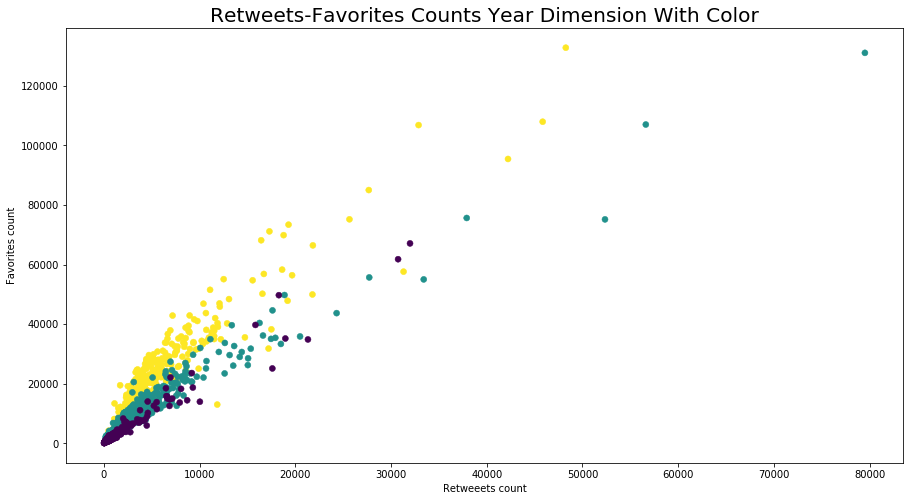

In [76]:
fig, ax = plt.subplots(figsize = (15, 8))
plt.style.use("fivethirtyeight")
ax.scatter(twitter_data['retweet_count'], twitter_data['favorite_count'], c = twitter_data.index)
ax.set_xlabel('Retweeets count')
ax.set_ylabel('Favorites count')

plt.title('Retweets-Favorites Counts Year Dimension With Color')
plt.show()
#Plot showing the distributions of the favorites and retweeet counts with the earlier years appearing as darker shades of 
#blue and the later times appearing as brighter shades of yellow

### The darker shade of blue is for the year 2015 while the green shade is for the year 2016 and the brighter shade of yellow is for year 2017. Most of the retweets fall within the range of 0-10000 while that of favorites fall within 0 - 40000 with a few outliers. The outliers were mostly from the year 2016 and 2017.

In [77]:
#Grouping the month, retweet count and favorite count for analysis
month_df = twitter_data.groupby('month')[['retweet_count', 'favorite_count']].sum()
month_df

,retweet_count,favorite_count
month,,
April,320884,1178300
August,232007,681425
December,836084,2136248
February,457818,1664466
January,677532,1965498
July,555022,2172565
June,616602,2033679
March,424441,1514301
May,440206,1561307


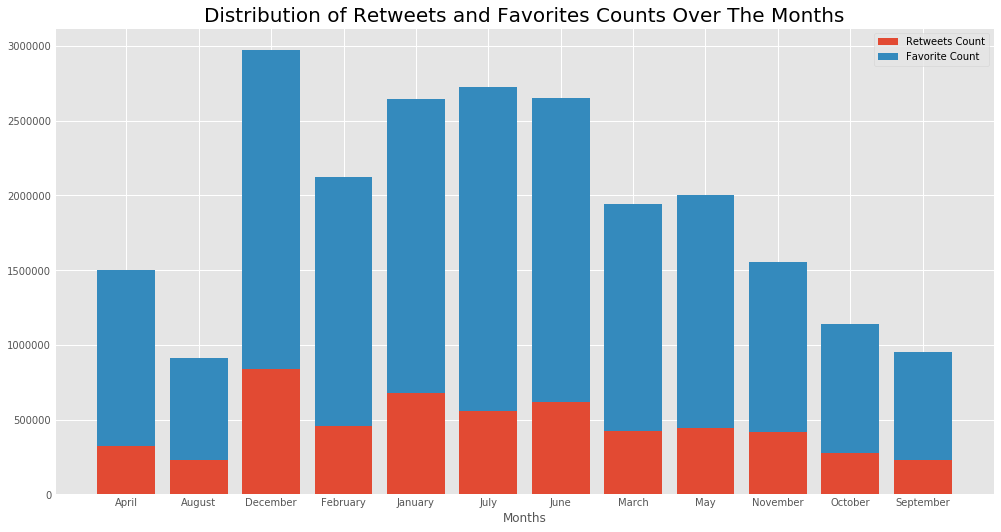

In [78]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,8))

ax.bar(month_df.index, month_df['retweet_count'], label = 'Retweets Count')
ax.bar(month_df.index, month_df['favorite_count'], bottom = month_df['retweet_count'], label = 'Favorite Count')

ax.set_xlabel('Months')
ax.set_ylabel('' )
ax.legend()
plt.title('Distribution of Retweets and Favorites Counts Over The Months', fontsize = 20)
plt.show()
#Plot showing the distribution of retweets and favorites counts over the months

### The month of June had the highest number of retweets and favorites count while the month of September and August had the least.

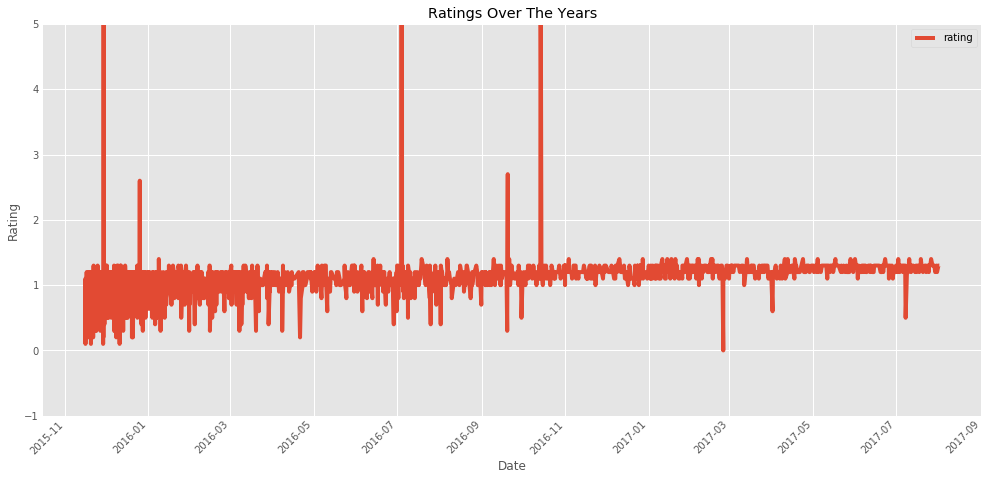

In [79]:
twitter_data.plot(x='timestamp', y='rating', kind ='line', rot = 45, figsize = (15,8))
plt.ylim(-1, 5)
plt.style.use('ggplot')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Ratings Over The Years')
plt.show()
#plot showing the ratings over the years

### The ratings over the years fall within the range 0 - 2 with a few outliers. The outliers account for the unique rating system of wedogrates.

In [80]:
#Function for grouping the dog breeds, retweet count and favorite count
def pred_dogs(pred, pred_dog):
    p_dogs = twitter_data.query(pred) 
    p_dog = p_dogs.groupby(pred_dog)[['retweet_count','favorite_count']].sum().sort_values('favorite_count', ascending = False).head(10)
    return p_dog

#Function for the barh plots
def barh_plots(dog_breed, TITLE, STYLE):
    fig, ax = plt.subplots(figsize = (15,8))
    ax.barh(dog_breed.index, dog_breed['favorite_count'])
    plt.style.use(STYLE)
    ax.set_xlabel('Favorites Count', fontsize = 15)
    ax.set_ylabel('Dog breeds', fontsize = 15)
    plt.title(TITLE)
    plt.show()


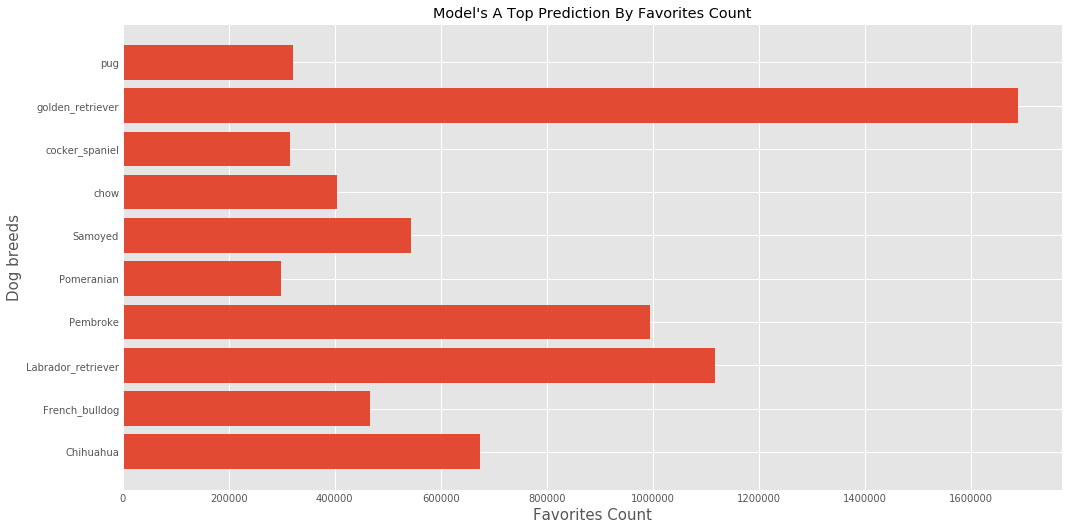

In [81]:
p1_dogs = pred_dogs('p1_dog == True', 'p1')
barh_plots(p1_dogs, "Model's A Top Prediction By Favorites Count", 'dark_background')
#Plot showing the top ten dog breeds by favorites count

### The  Labrador retriever and Golden retriever were the top dog two breeds predicted by Model A based on the favorites count from the plot.

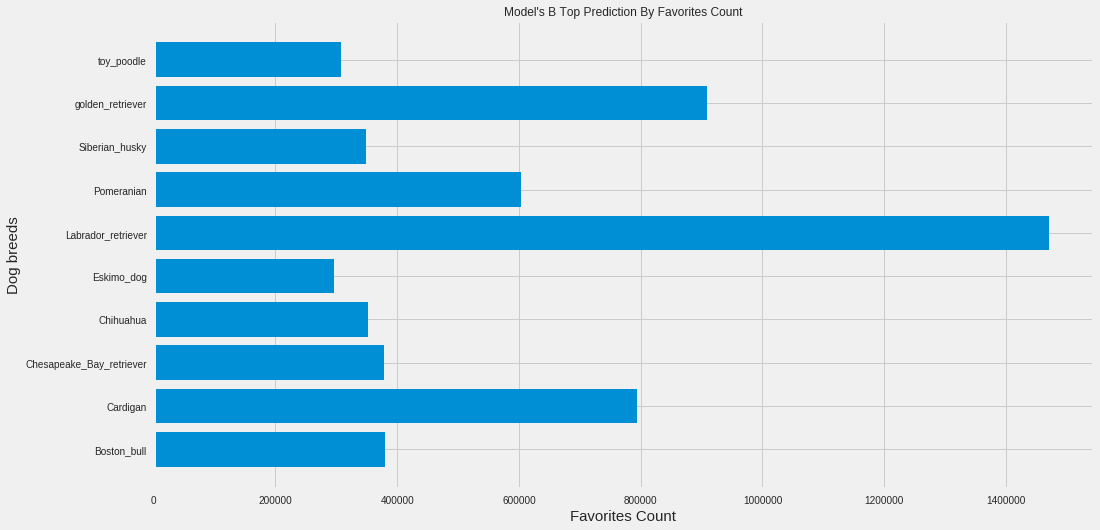

In [84]:
#Plot showing the top ten dog breeds by favorites count
p2_dogs = pred_dogs('p2_dog == True', 'p2')
barh_plots(p2_dogs, "Model's B Top Prediction By Favorites Count", 'seaborn')

### The Golden retriever and Labrador retriever were also the top two breeds predicted by Model B based on the favorites count from the plot.

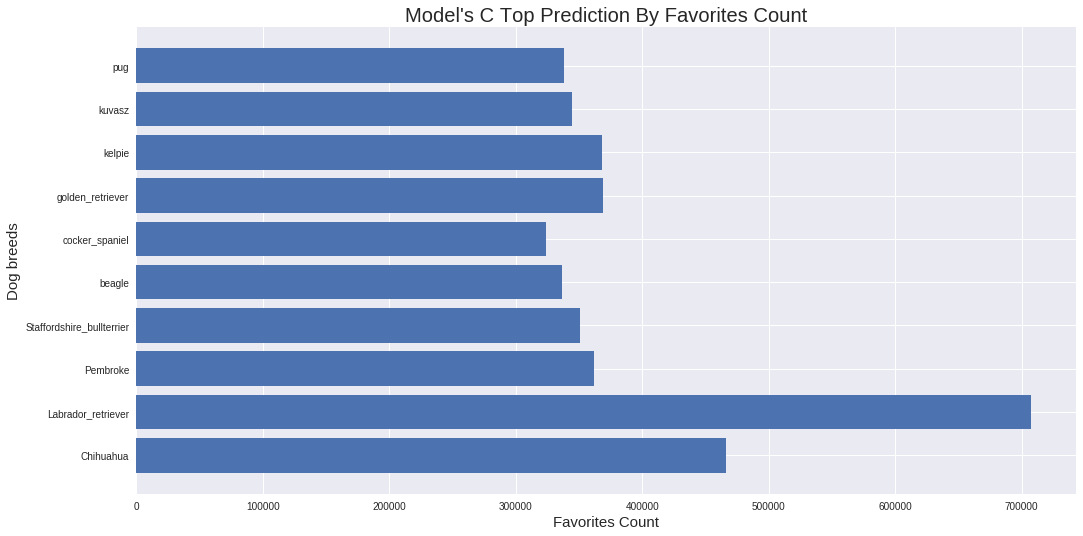

In [83]:
#Plot showing the top ten dog breeds by favorites count
p3_dogs = pred_dogs('p3_dog == True', 'p3')
barh_plots(p3_dogs, "Model's C Top Prediction By Favorites Count", 'fivethirtyeight')

### The Labrador retriever and Chihuahua were the top two breeds predicted by Model C based on the favorites count from the plot.

### Resources:

### Unique rating system: http://knowyourmeme.com/memes/theyre-good-dogs-brent

### Tidy Data: https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html

### Plagiarism Tweet: https://t.co/YbEJPkg4Ag

###  No dog in picture tweet: https://t.co/Asgdc6kuLX